In [2]:
# 使用Prophet预测manning未来365天的页面流量
# 从2007年12月10日开始
import pandas as pd
try:
    from fbprophet import Prophet
except Exception:
    from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集
df = pd.read_csv('./shanghai_index_1990_12_19_to_2020_03_12.csv')
# 修改列名 Timestamp => ds, Price => y
df.rename(columns={'Timestamp':'ds', 'Price':'y'}, inplace=True)
print(df.head())

           ds       y  stock_volume  amount_volume
0  1990/12/19   99.98          1260       494000.0
1  1990/12/20  104.39           197        84000.0
2  1990/12/21  109.13            28        16000.0
3  1990/12/24  114.55            32        31000.0
4  1990/12/25  120.25            15         6000.0


14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
7505 2021-03-08  3172.274418  2657.149640  3857.196337
7506 2021-03-09  3169.585800  2617.571870  3748.593761
7507 2021-03-10  3172.202516  2621.992079  3789.520697
7508 2021-03-11  3169.278543  2597.284152  3748.778141
7509 2021-03-12  3169.243160  2601.427157  3842.841352


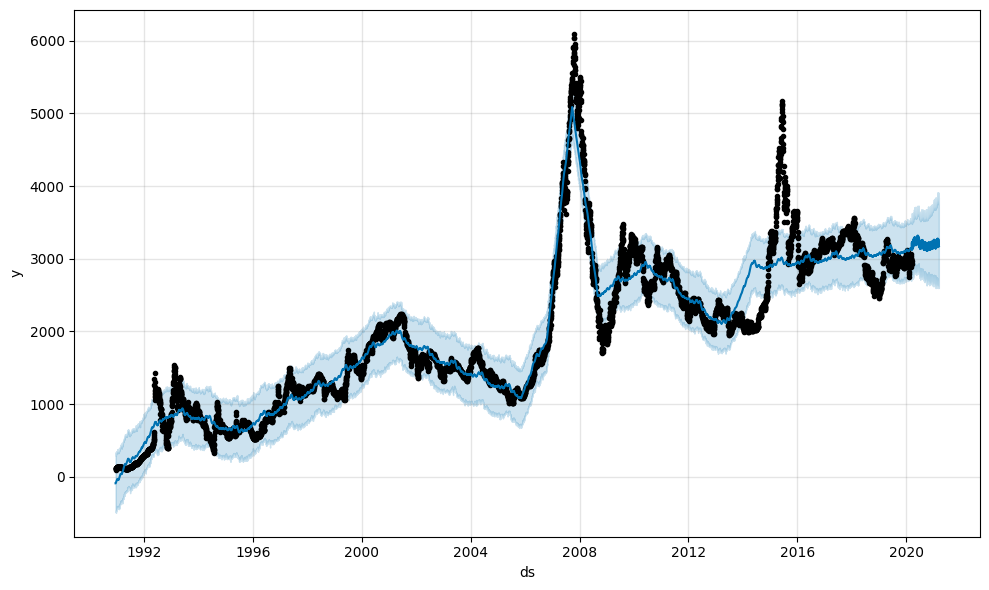

In [3]:
#print(df.tail())
# 拟合模型
model = Prophet()
model.fit(df)

# 构建待预测日期数据框，periods = 365 代表除历史数据的日期外再往后推 365 天
future = model.make_future_dataframe(periods=365)
#print(future.tail())

# 预测数据集
forecast = model.predict(future)
#print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


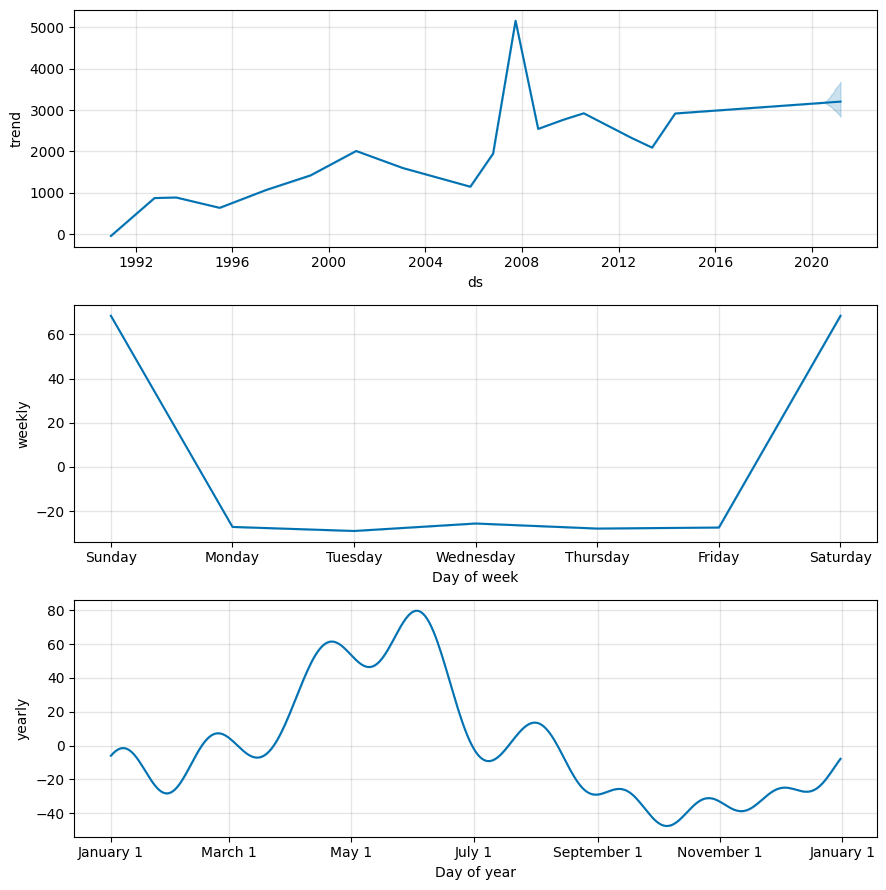

In [4]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)
